- 133개의  행, 132개는 증상들 마지막 한개가 병명

In [3]:
# import libraries
import numpy as np
import pandas as pd
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# 데이터 불러오기 

In [27]:
import os

In [36]:
data_path = 'data/Training.csv'
data = pd.read_csv(data_path).dropna(axis = 1)
data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


# 데이터 확인 

In [39]:
disease_counts = data["prognosis"].value_counts()
temp_df = pd.DataFrame({
    "Disease": disease_counts.index,
    "Counts": disease_counts.values
})

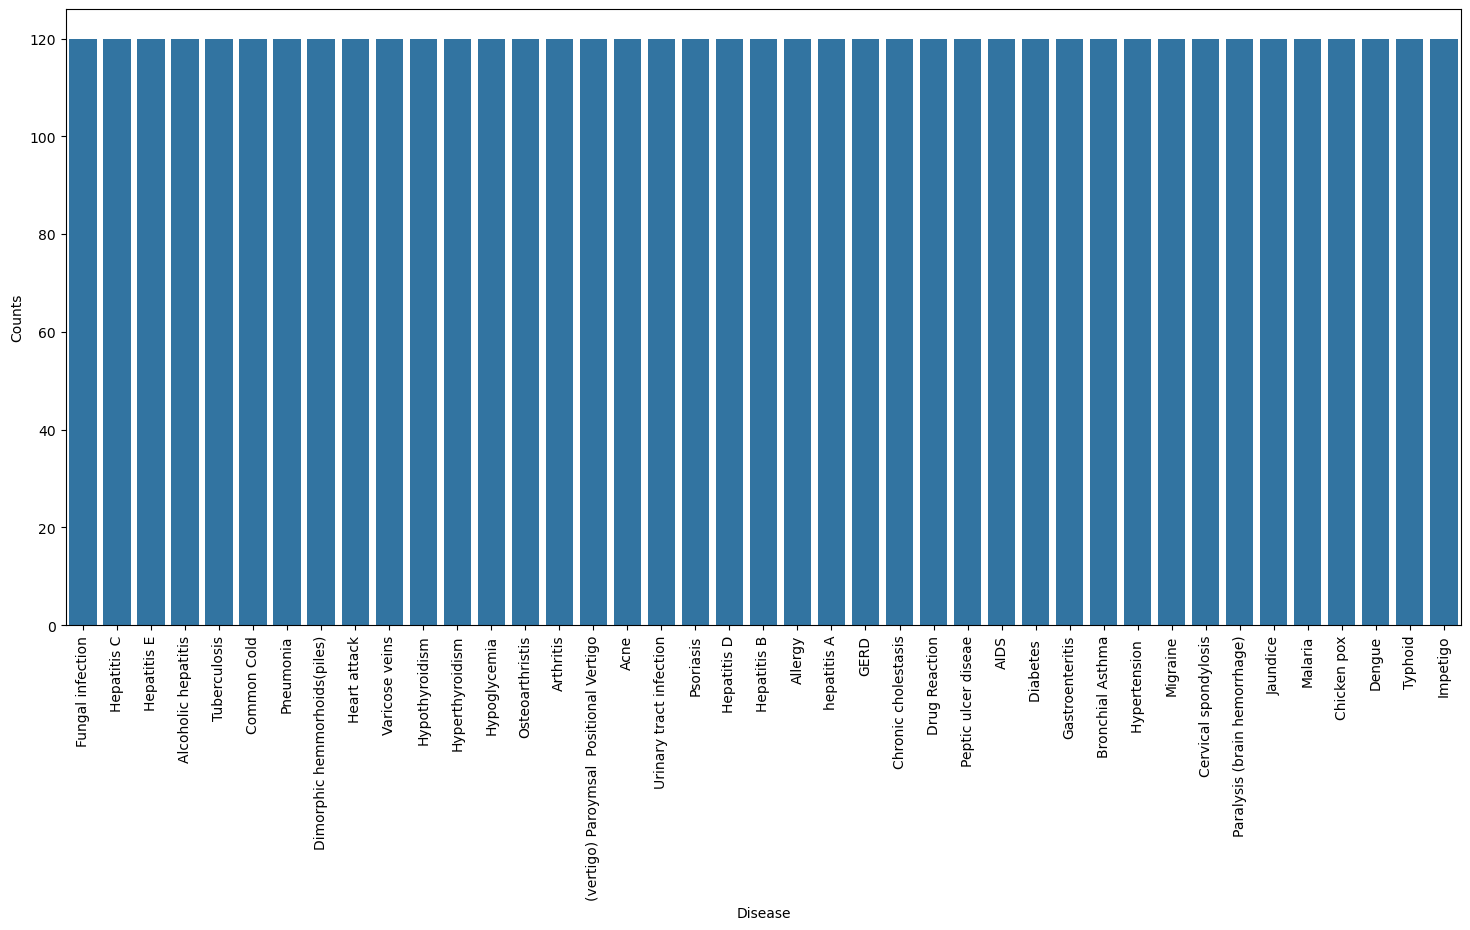

In [40]:
plt.figure(figsize = (18, 8))
sns.barplot(x = "Disease", y = "Counts", data = temp_df)
plt.xticks(rotation = 90)
plt.show()

In [44]:
# Encoding the target value into numerical value using LabelEncoder
encoder = LabelEncoder()
data["prognosis"] = encoder.fit_transform(data["prognosis"])

- 원핫인코딩

In [45]:
x = data.iloc[:,:-1]  # -1 빼고 전체
y = data.iloc[:, -1] # -1개만 뽑아준거
x_train, x_test, y_train, y_test = train_test_split(
            x, y, test_size = 0.2, random_state = 24)

In [46]:
print(f"Train: {x_train.shape}, {y_train.shape}")
print(f"Test: {x_test.shape}, {y_test.shape}")

Train: (3936, 132), (3936,)
Test: (984, 132), (984,)


In [47]:
# Defining scoring metric for k-fold cross validation
def cv_scoring(estimator, x, y):
    return accuracy_score(y, estimator.predict(x))

In [49]:
# initializing Models
models = {
    "SVC":SVC(),
    "Gaussian NB": GaussianNB(),
    "Random Forest": RandomForestClassifier(random_state = 18)
}

In [51]:
# Producing cross validation score for the models
for model_name in models:
    model = models[model_name]
    scores = cross_val_score(model, x, y, cv = 10,
                            n_jobs = -1,
                            scoring = cv_scoring)
    
    print("=="*30)
    print(model_name)
    print(f"Scores: [scores]")
    print(f"Mean Score: {np.mean(scores)}")

SVC
Scores: [scores]
Mean Score: 1.0
Gaussian NB
Scores: [scores]
Mean Score: 1.0
Random Forest
Scores: [scores]
Mean Score: 1.0


In [52]:
# Training and testing SVM Classifier (모델 만들기)
svm_model = SVC()
svm_model.fit(x_train, y_train)
preds = svm_model.predict(x_test)

In [53]:
print(f"Accuracy on train data by SVM Classifier\
: {accuracy_score(y_train, svm_model.predict(x_train))*100}")

Accuracy on train data by SVM Classifier: 100.0


In [56]:
print(f"Accuracy on test data by SVM Classifier\
: {accuracy_score(y_test,preds)*100}")

Accuracy on test data by SVM Classifier: 100.0


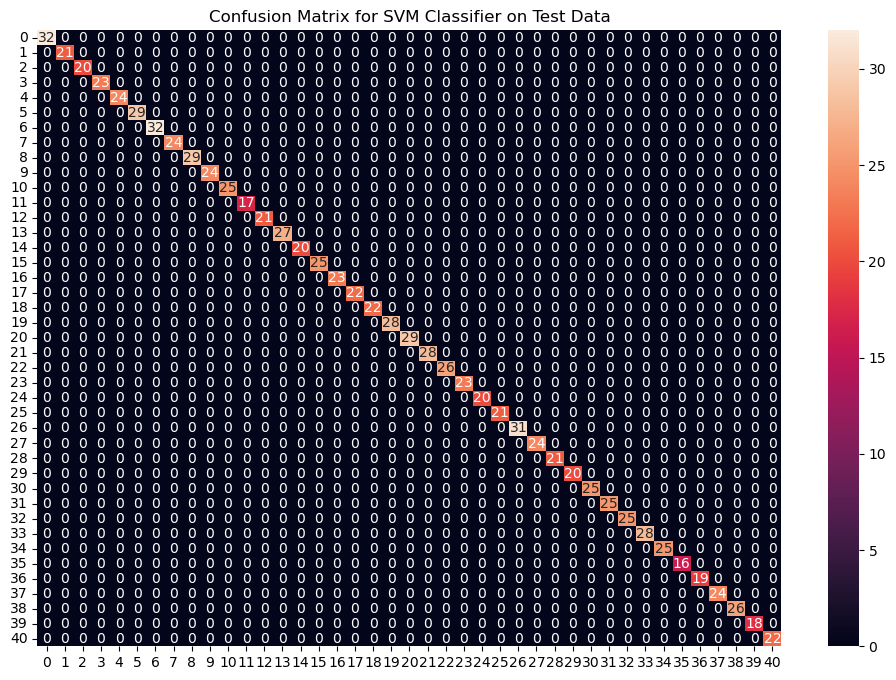

In [57]:
cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize = (12, 8))
sns.heatmap(cf_matrix, annot = True) # 숫자구분
plt.title("Confusion Matrix for SVM Classifier on Test Data")
plt.show()

In [58]:
# Training and testion Naive Bayes Classifier
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)
preds = nb_model.predict(x_test)
print(f"Accuracy on train data by Naive Bayes Classifier\
: {accuracy_score(y_train, nb_model.predict(x_train))*100}")

Accuracy on train data by Naive Bayes Classifier: 100.0


In [59]:
print(f"Accuracy on test data by Naive Bayes Classifier\
: {accuracy_score(y_test, preds)*100}")

Accuracy on test data by Naive Bayes Classifier: 100.0


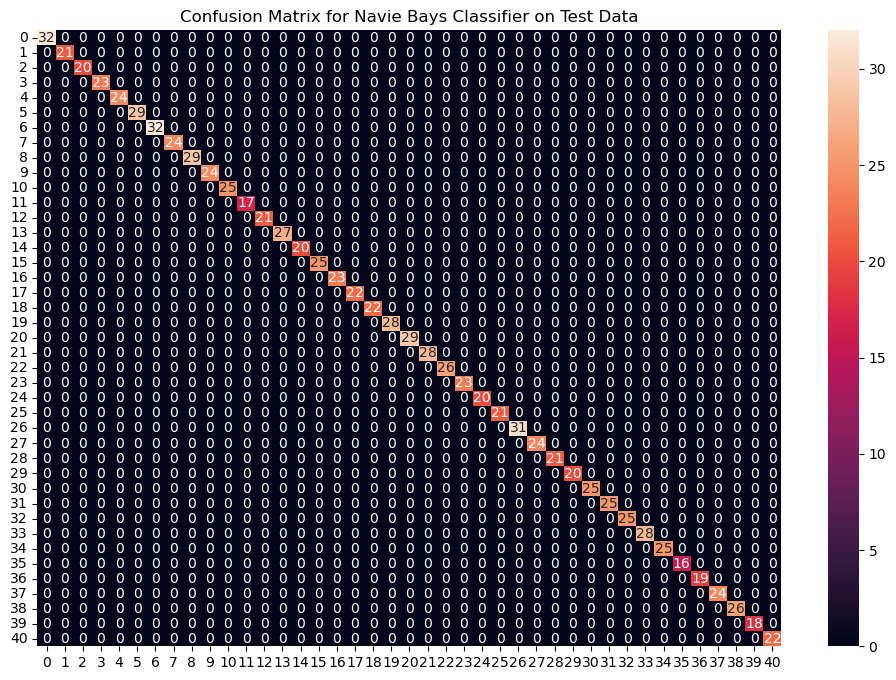

In [60]:
cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize = (12, 8))
sns.heatmap(cf_matrix, annot = True)
plt.title("Confusion Matrix for Navie Bays Classifier on Test Data")
plt.show()

In [61]:
# Training and testing Random Forest Classifier
rf_model = RandomForestClassifier(random_state = 18)
rf_model.fit(x_train, y_train)
preds = rf_model.predict(x_test)
print(f"Accuracy on train data by Random Forest Classifier\
: {accuracy_score(y_train, rf_model.predict(x_train))*100}")

Accuracy on train data by Random Forest Classifier: 100.0


In [62]:
print(f"Accuracy on test data by Random Forest Classifier\
: {accuracy_score(y_test, preds)*100}")

Accuracy on test data by Random Forest Classifier: 100.0


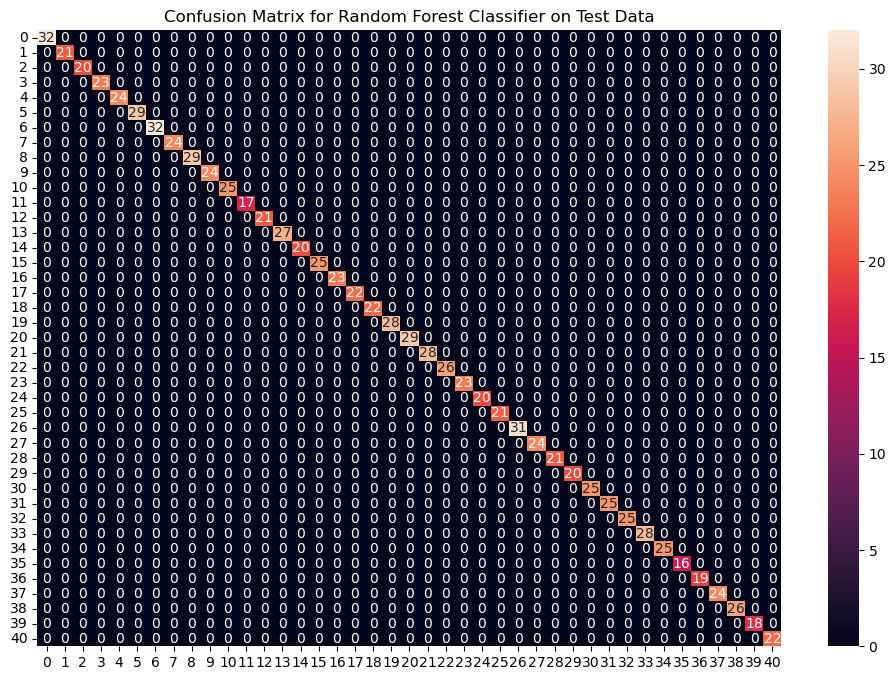

In [63]:
cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize = (12, 8))
sns.heatmap(cf_matrix, annot = True)
plt.title("Confusion Matrix for Random Forest Classifier on Test Data")
plt.show()

### 최종으로 모델 만들어서 fit 

In [64]:
# Training the models on whole data
final_svm_model = SVC()
final_nb_model = GaussianNB()
final_rf_model = RandomForestClassifier(random_state = 18)
final_svm_model.fit(x, y)
final_nb_model.fit(x, y)
final_rf_model.fit(x, y)

RandomForestClassifier(random_state=18)

### test 데이터로 예측

In [73]:
# Reading the test data
test_data = pd.read_csv("data/Testing.csv").dropna(axis = 1)

In [74]:
test_x = test_data.iloc[:,:-1]
test_y = encoder.transform(test_data.iloc[:, -1])

In [75]:
# Making prediction by  take mode of predictions made by all the classifiers
svm_preds = final_svm_model.predict(test_x)
nb_preds = final_nb_model.predict(test_x)
rf_preds = final_rf_model.predict(test_x)

In [78]:
final_preds = [mode([i, j, k], keepdims = True)[0][0] for i, j,
                k in zip(svm_preds, nb_preds, rf_preds)]

In [ ]:
#  keepdims = True : 최빈값 찾는 함수

In [79]:
print(f"Accuracy on Test dataset by the combined model\
: {accuracy_score(test_y, final_preds) * 100}")

Accuracy on Test dataset by the combined model: 100.0


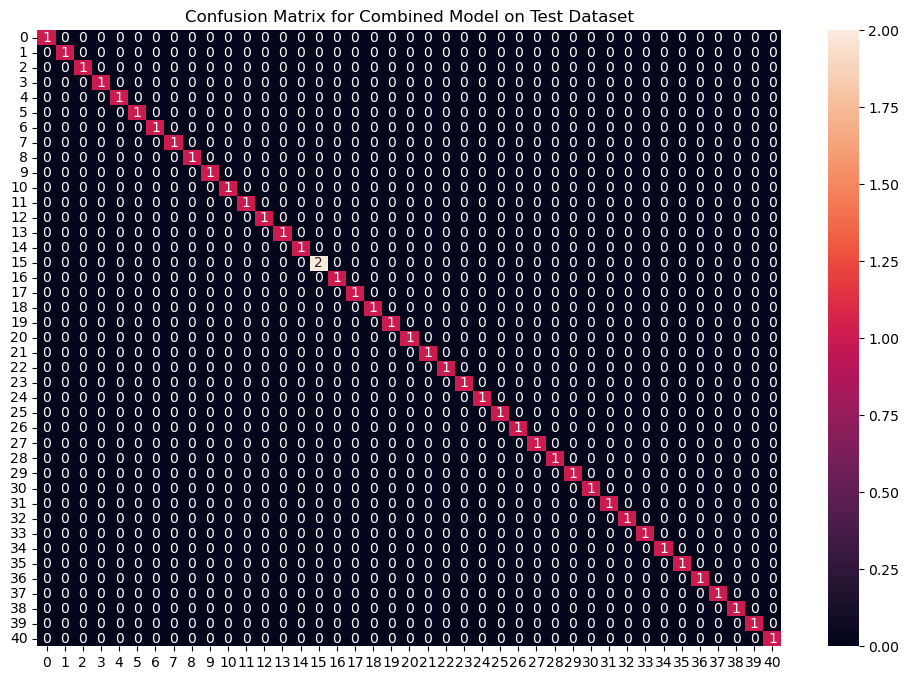

In [80]:
cf_matrix = confusion_matrix(test_y, final_preds)
plt.figure(figsize = (12, 8))

sns.heatmap(cf_matrix, annot = True)
plt.title("Confusion Matrix for Combined Model on Test Dataset")
plt.show()

In [81]:
symptoms = x.columns.values

In [82]:
# Creating a symptom index dictionary encode the
# input symptom into numerical form
symptom_index = {}
for index, value in enumerate(symptoms):
    symptom = " ".join([i.capitalize() for i in value.split("_")])
    symptom_index[symptom] = index
    
data_dict = {
    "symptom_index": symptom_index,
    "predictions_classes":encoder.classes_
}

In [83]:
data_dict

{'symptom_index': {'Itching': 0,
  'Skin Rash': 1,
  'Nodal Skin Eruptions': 2,
  'Continuous Sneezing': 3,
  'Shivering': 4,
  'Chills': 5,
  'Joint Pain': 6,
  'Stomach Pain': 7,
  'Acidity': 8,
  'Ulcers On Tongue': 9,
  'Muscle Wasting': 10,
  'Vomiting': 11,
  'Burning Micturition': 12,
  'Spotting  urination': 13,
  'Fatigue': 14,
  'Weight Gain': 15,
  'Anxiety': 16,
  'Cold Hands And Feets': 17,
  'Mood Swings': 18,
  'Weight Loss': 19,
  'Restlessness': 20,
  'Lethargy': 21,
  'Patches In Throat': 22,
  'Irregular Sugar Level': 23,
  'Cough': 24,
  'High Fever': 25,
  'Sunken Eyes': 26,
  'Breathlessness': 27,
  'Sweating': 28,
  'Dehydration': 29,
  'Indigestion': 30,
  'Headache': 31,
  'Yellowish Skin': 32,
  'Dark Urine': 33,
  'Nausea': 34,
  'Loss Of Appetite': 35,
  'Pain Behind The Eyes': 36,
  'Back Pain': 37,
  'Constipation': 38,
  'Abdominal Pain': 39,
  'Diarrhoea': 40,
  'Mild Fever': 41,
  'Yellow Urine': 42,
  'Yellowing Of Eyes': 43,
  'Acute Liver Failure': 4

In [88]:
# 증상을 받는 함수
# Defining the Function
# Input : string containing symptoms separated by commas
# Output : Generated predictions by midels
def predictDisease(symptoms):
    symptoms = symptoms.split(",")
    
    # Creating input data for the models
    input_data = [0] * len(data_dict["symptom_index"])
    for symptom in symptoms:
        index = data_dict["symptom_index"][symptom]
        input_data[index] = 1
        
    # reshaping the input data and converting it
    # into suitable format for model predictions
    input_data = np.array(input_data).reshape(1, -1)
    
    # generating individual outputs
    rf_prediction = data_dict["predictions_classes"][final_rf_model.predict(input_data)[0]]
    nb_prediction = data_dict["predictions_classes"][final_nb_model.predict(input_data)[0]]
    svm_prediction = data_dict["predictions_classes"][final_svm_model.predict(input_data)[0]]
    
    # making final prediction by taking mode of all predictions
    df = pd.DataFrame([rf_prediction, nb_prediction, svm_prediction])
    final_prediction = df.mode()
    predictions = {
        "rf_model_prediction": rf_prediction,
        "navie_bayes_prediction": nb_prediction,
        "svm_model_prediction": svm_prediction,
        "final_prediction":final_prediction
    }
    return predictions

In [92]:
# Testing the function
print(predictDisease("Chills,Joint Pain"))

{'rf_model_prediction': 'Allergy', 'navie_bayes_prediction': 'Allergy', 'svm_model_prediction': 'Allergy', 'final_prediction':          0
0  Allergy}


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
